### Implementation of https://www.sciencedirect.com/science/article/pii/S0960077923001509

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Du = 2.8e-4
Dv = 5e-3
tau = .1
k = -.005

In [3]:
size = 100 
dx = 2. / size 
T = 9.0
dt = .001
n = int(T / dt)

In [4]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

## Calculate the Laplacian

In [5]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

In [6]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

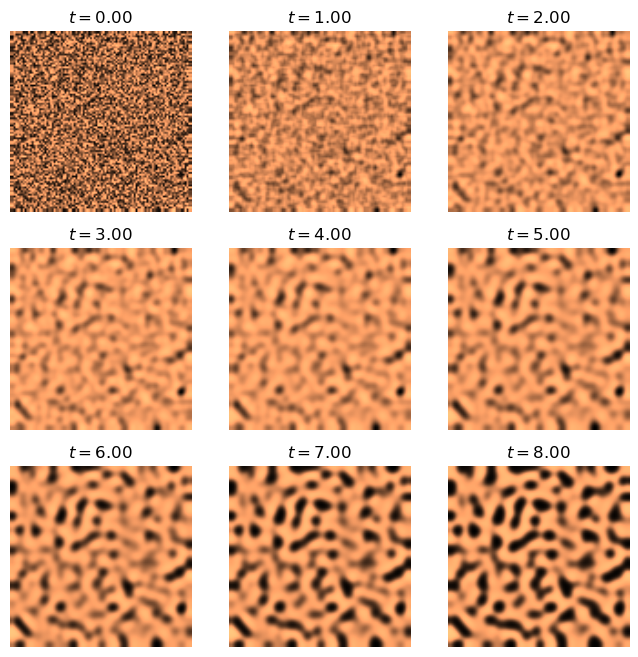

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# Simulate the PDE with the "finite difference method"

for i in range(n):
    # Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)

    # Claculate values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    # Update variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (Du * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (Dv * deltaV + Uc - Vc) / tau
    
    # Neumann conditions: derivatives at the edges are zero.
    
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')